In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, "/home/storage/hans/jax_reco_new")
from lib.plotting import adjust_plot_1d

In [43]:
def GreatCircleDistance(azi_1, zen_1, azi_2, zen_2):
        ra_1 = azi_1
        ra_2 = azi_2
        dec_1 = np.pi/2.0 - zen_1
        dec_2 = np.pi/2.0 - zen_2
        '''Compute the great circle distance between two events'''
        '''All coordinates must be given in radians'''
        delta_dec = np.abs(dec_1 - dec_2)
        delta_ra = np.abs(ra_1 - ra_2)
        x = (np.sin(delta_dec / 2.))**2. + np.cos(dec_1) *\
            np.cos(dec_2) * (np.sin(delta_ra / 2.))**2.
        return 2. * np.arcsin(np.sqrt(x))

def get_gcd(results):
    scale = 100.0
    reco_zenith, reco_azimuth = results[:, -6]/scale, results[:, -5]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    gcd = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, reco_azimuth, reco_zenith))
    gcd_smpe = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, smpe_azimuth, smpe_zenith))
    muon_energy = results[:, 0]
    return gcd, gcd_smpe, muon_energy

def get_zen_azi(results):
    scale = 100.0
    reco_zenith, reco_azimuth = results[:, -6]/scale, results[:, -5]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    return track_src_v[:, 0], track_src_v[:, 1], reco_zenith, reco_azimuth, smpe_zenith, smpe_azimuth

def get_hist(results):
    gcd, gcd_smpe, muon_energy = get_gcd(results)
    print(np.amax(gcd), np.amax(gcd_smpe))
    print(np.median(gcd), np.median(gcd_smpe))
    bins = np.linspace(0.0, 3.0, 41)
    cts, _ = np.histogram(gcd, bins=bins)
    cts_smpe, _ = np.histogram(gcd_smpe, bins=bins)
    return cts, bins, cts_smpe

def get_percentiles(results):
    gcd, gcd_smpe, muon_energy = get_gcd(results)
    ps = np.percentile(gcd, [16, 50, 84])
    ps_smpe = np.percentile(gcd_smpe, [16, 50, 84])
    return ps, ps_smpe

In [44]:
import glob

starting_ids = set([51687, 9410, 27285, 8, 63373, 1722, 21663, 59228, 32839, 19455, 25632, 40023, 59010, 57174])

fs = glob.glob('/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_*_w_corr_filter_prepulse_tfrecord.npy')
print(len(fs))
tpn_mpe_v = []
s_mpe_v = []

n=0
for f in fs:
    #if int(f.split("_")[-2]) in starting_ids:
    #    print(f.split("_")[-2])
    #    continue
        
    dat = np.load(f)
    tpn_mpe, s_mpe = get_percentiles(dat)
    if tpn_mpe[1] < 0.01:
        print(f)
    tpn_mpe_v.append(tpn_mpe)
    s_mpe_v.append(s_mpe)
    n+=1

99
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_54374_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_9505_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_34506_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_56774_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_29707_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_16416_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_59089_w_corr_filter_prepulse_tfrecord.npy


In [45]:
for f in fs:
    #if int(f.split("_")[-2]) in starting_ids:
    #    print(f.split("_")[-2])
    #    continue
        
    dat = np.load(f)
    tpn_mpe, s_mpe = get_percentiles(dat)
    if tpn_mpe[1] / s_mpe[1] > 2:
        print(f)

/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_33656_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_59010_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_27285_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_25596_w_corr_filter_prepulse_tfrecord.npy
/home/storage/hans/jax_reco_new/examples/reco_realtime/update/results/reco_result_13945_w_corr_filter_prepulse_tfrecord.npy


In [46]:
arr = [51687, 9410, 27285, 8, 63373, 1722, 21663, 59228, 32839, 19455, 25632, 40023, 59010, 57174]
arr.sort()
print(arr)

[8, 1722, 9410, 19455, 21663, 25632, 27285, 32839, 40023, 51687, 57174, 59010, 59228, 63373]


92


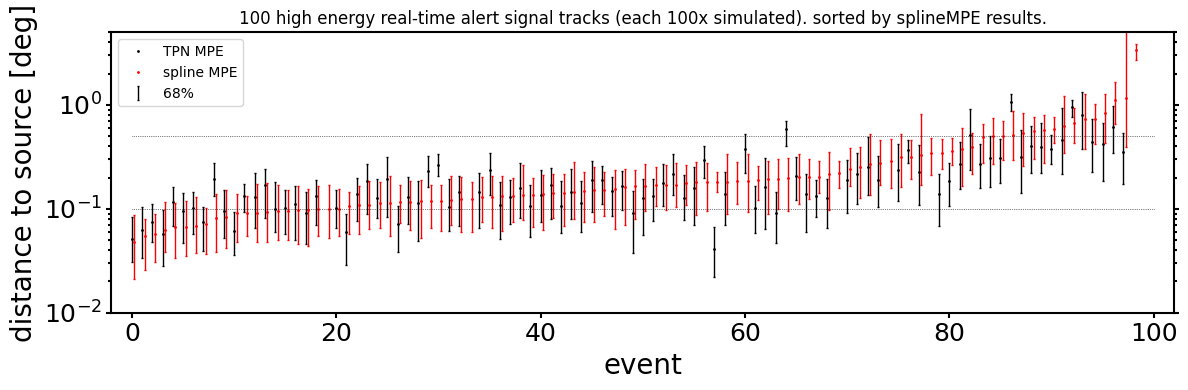

In [47]:
fig, ax = plt.subplots(figsize=(12,4))
#x = np.array(list(range(99)))
x = np.array(list(range(n)))
y = np.array([t[1] for t in tpn_mpe_v])

print(len(y[y>0.01]))

z = np.array([t[1] for t in s_mpe_v])

idx = np.argsort(z)
z = z[idx]
y = y[idx]
y_err_up = np.array([t[2] for t in tpn_mpe_v])[idx] - y
y_err_low = y - np.array([t[0] for t in tpn_mpe_v])[idx]

#y_err_up = np.array([t[2] for t in tpn_mpe_v]) - y
#y_err_low = y - np.array([t[0] for t in tpn_mpe_v])


z_err_up = np.array([t[2] for t in s_mpe_v])[idx] - z
z_err_low = z - np.array([t[0] for t in s_mpe_v])[idx]

#z = np.array([t[1] for t in s_mpe_v])
#z_err_up = np.array([t[2] for t in s_mpe_v]) - z
#z_err_low = z - np.array([t[0] for t in s_mpe_v])

ax.errorbar(x, y, yerr=[y_err_low, y_err_up], capsize=1, linewidth=0, elinewidth=1, color='black', label='68%')
ax.plot(x, y, "ko", markersize=1, label='TPN MPE')

dx = 0.25 * (x[1:] - x[:-1])
dx = np.concatenate([dx, np.array([dx[-1]])])
ax.errorbar(x+dx, z, yerr=[z_err_low, z_err_up], capsize=1, linewidth=0, elinewidth=1, color='red')
ax.plot(x+dx, z, "ro", markersize=1, label='spline MPE')
ax.set_yscale('log')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', lw=0.5, color='k')
ax.plot([0.0, 100.0], [0.1, 0.1], linestyle='dotted', lw=0.5, color='k')

plot_args = {'xlabel':'event', 
                 'ylabel':'distance to source [deg]', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.01, 5]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
plt.tight_layout()
plt.show()

/tmp/ipykernel_427844/1995518661.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')


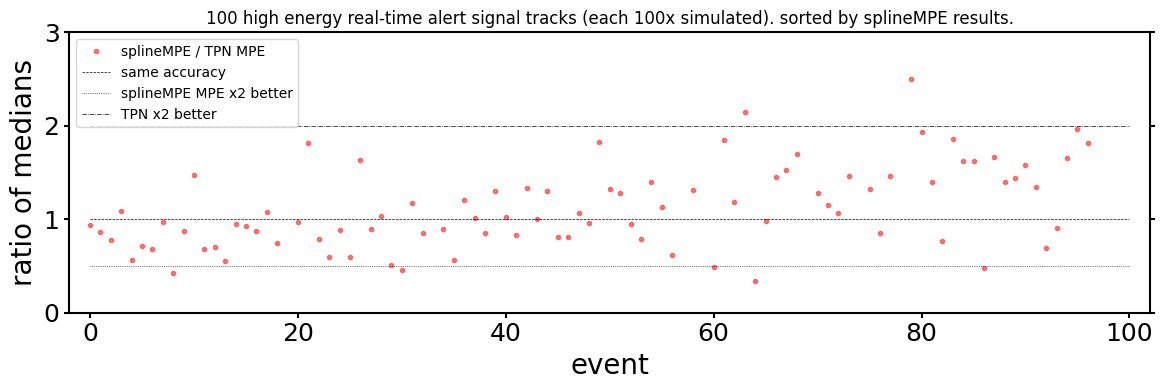

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')
ax.plot([0.0, 100.0], [1.0, 1.0], linestyle='dashed', color='k', lw=0.5, label='same accuracy')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', color='k', lw=0.5, label='splineMPE MPE x2 better')
ax.plot([0.0, 100.0], [2.0, 2.0], linestyle='dashdot', color='k', lw=0.5, label='TPN x2 better')
plot_args = {'xlabel':'event', 
                 'ylabel':'ratio of medians', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.0, 3.0]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
idx = y > 0.01
print(np.percentile(y[idx], [10, 50, 90]))
print(np.percentile(z[idx], [10, 50, 90]))

[0.09021048 0.14592872 0.40140484]
[0.08389939 0.15848288 0.55889346]


In [49]:
np.percentile(y[idx], [10, 50, 90]) / np.percentile(z[idx], [10, 50, 90])

array([1.07522216, 0.92078539, 0.71821353])

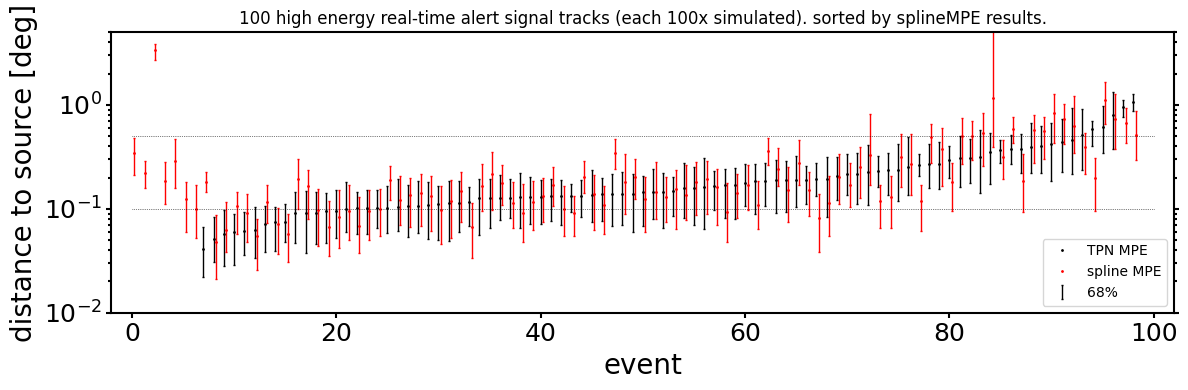

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
#x = np.array(list(range(99)))
x = np.array(list(range(n)))
y = np.array([t[1] for t in tpn_mpe_v])
z = np.array([t[1] for t in s_mpe_v])

idx = np.argsort(y)
z = z[idx]
y = y[idx]
y_err_up = np.array([t[2] for t in tpn_mpe_v])[idx] - y
y_err_low = y - np.array([t[0] for t in tpn_mpe_v])[idx]

#y_err_up = np.array([t[2] for t in tpn_mpe_v]) - y
#y_err_low = y - np.array([t[0] for t in tpn_mpe_v])


z_err_up = np.array([t[2] for t in s_mpe_v])[idx] - z
z_err_low = z - np.array([t[0] for t in s_mpe_v])[idx]

#z = np.array([t[1] for t in s_mpe_v])
#z_err_up = np.array([t[2] for t in s_mpe_v]) - z
#z_err_low = z - np.array([t[0] for t in s_mpe_v])

ax.errorbar(x, y, yerr=[y_err_low, y_err_up], capsize=1, linewidth=0, elinewidth=1, color='black', label='68%')
ax.plot(x, y, "ko", markersize=1, label='TPN MPE')

dx = 0.25 * (x[1:] - x[:-1])
dx = np.concatenate([dx, np.array([dx[-1]])])
ax.errorbar(x+dx, z, yerr=[z_err_low, z_err_up], capsize=1, linewidth=0, elinewidth=1, color='red')
ax.plot(x+dx, z, "ro", markersize=1, label='spline MPE')
ax.set_yscale('log')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', lw=0.5, color='k')
ax.plot([0.0, 100.0], [0.1, 0.1], linestyle='dotted', lw=0.5, color='k')

plot_args = {'xlabel':'event', 
                 'ylabel':'distance to source [deg]', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.01, 5]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
plt.tight_layout()
plt.show()

/tmp/ipykernel_427844/1995518661.py:2: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')


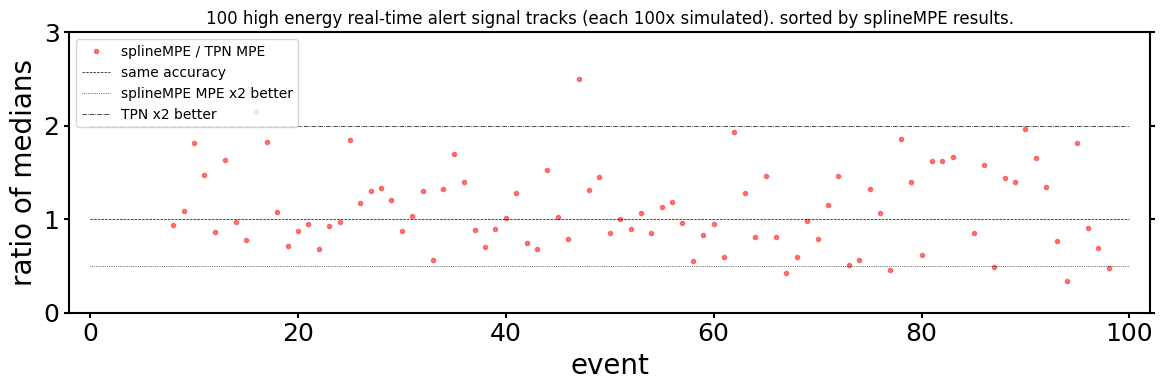

In [31]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, z/y, "ro", markersize=3, alpha=0.5, label='splineMPE / TPN MPE')
ax.plot([0.0, 100.0], [1.0, 1.0], linestyle='dashed', color='k', lw=0.5, label='same accuracy')
ax.plot([0.0, 100.0], [0.5, 0.5], linestyle='dotted', color='k', lw=0.5, label='splineMPE MPE x2 better')
ax.plot([0.0, 100.0], [2.0, 2.0], linestyle='dashdot', color='k', lw=0.5, label='TPN x2 better')
plot_args = {'xlabel':'event', 
                 'ylabel':'ratio of medians', 
                 'xlim':[-2.0, 102], 
                 'ylim':[0.0, 3.0]}
adjust_plot_1d(fig, ax, plot_args=plot_args)
ax.set_title("100 high energy real-time alert signal tracks (each 100x simulated). sorted by splineMPE results.")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
print(np.median(z/y))

1.0803023862319112


/tmp/ipykernel_427844/2661346231.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.median(z/y))


In [33]:
idx = y > 0.01

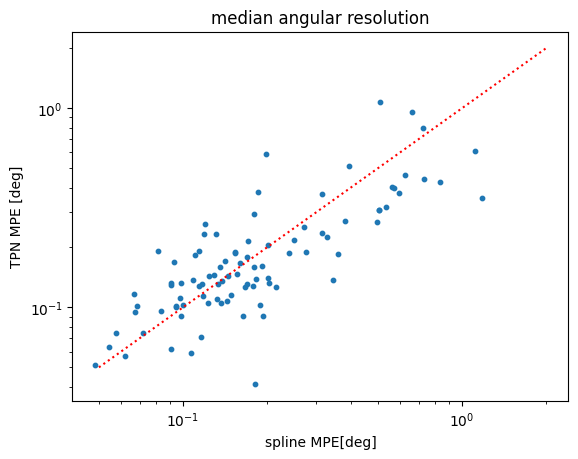

In [34]:
plt.figure()
plt.title("median angular resolution")
plt.scatter(z[idx], y[idx], s=10)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('TPN MPE [deg]')
plt.xlabel('spline MPE[deg]')
plt.plot([0.05, 2.0], [0.05, 2.0], color="red", linestyle="dotted")

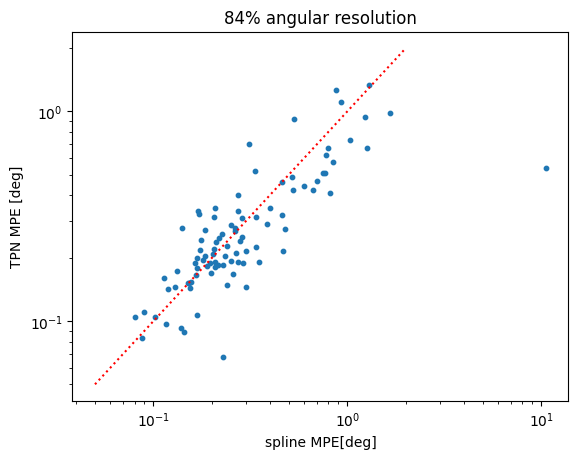

In [35]:
y = np.array([t[2] for t in tpn_mpe_v])
idx = y > 0.01

z = np.array([t[2] for t in s_mpe_v])

plt.figure()
plt.title("84% angular resolution")
plt.scatter(z[idx], y[idx], s=10)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('TPN MPE [deg]')
plt.xlabel('spline MPE[deg]')
plt.plot([0.05, 2.0], [0.05, 2.0], color="red", linestyle="dotted")

In [54]:
print(len(y[idx]))

92


In [56]:
idx2 = z[idx] - y[idx] > 0

In [57]:
print(len(y[idx][idx2]))

52


In [38]:
idx = y > 0.01

In [39]:
print(np.percentile(z[idx], [10, 50, 90]))

[0.13945851 0.24501573 0.81442431]


In [40]:
print(np.percentile(y[idx], [10, 50, 90]))

[0.14236751 0.23370827 0.66527919]


In [41]:
print(len(z))

99
